In [67]:
startColumn = 177
numMovies = 3 

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [113]:
data_df = pd.read_csv('movieRatingsDeidentified.csv')

M1 = pd.to_numeric(data_df['The Matrix (1999)'],errors='coerce').values
M2 = pd.to_numeric(data_df['The Matrix Reloaded (2003)'],errors='coerce').values
M3 = pd.to_numeric(data_df['The Matrix Revolutions (2003)'],errors='coerce').values

In [101]:
# 2) Row wise:
temp = np.array([pd.isnull(M1),pd.isnull(M2),pd.isnull(M3)],dtype=bool)
temp2 = temp*1 # convert boolean to int
temp2 = sum(temp2) # take sum of each participant
missingData = np.where(temp2>0) # find participants with missing data
M1 = np.delete(M1,missingData) # delete missing data from array
M2 = np.delete(M2,missingData) # delete missing data from array
M3 = np.delete(M3,missingData) # delete missing data from array
# Good: We have equal n now. 
# Bad: We only have 1493 out of 3204 we started with left
# That is a) suspicious, b) we lost a lot of power

#%% 3 Reformatting - V1: Format data into a representation to work with

combinedData = np.transpose(np.array([M1,M2,M3])) # 2D array
# We can now put the data into a 2D array because we have an equal number
# of rows for M1, M2 and M3

In [102]:
#%% 4a) Extrastriate cortex: Doing the actual specialized analyses
# Descriptive statistics - we are looking for very special numbers that
# capture the essence of the entire dataset - the typical number (central
# tendency) and the dispersion. Typically mean and SD. 

# Initialize container to store descriptives:
descriptivesContainer = np.empty([numMovies,4])
descriptivesContainer[:] = np.NaN 

# 2. Row-wise:
for ii in range(numMovies):
    descriptivesContainer[ii,0] = np.mean(combinedData[:,ii]) # mu
    descriptivesContainer[ii,1] = np.std(combinedData[:,ii]) # sigma
    descriptivesContainer[ii,2] = len(combinedData[:,ii]) # n
    descriptivesContainer[ii,3] = descriptivesContainer[ii,1]/np.sqrt(descriptivesContainer[ii,2]) # sem

In [103]:
#%% 4b) Extrastriate cortex part II: Inferential statistics

# Because our n's are now equal, we can now do a t-test for dependent
# groups (which is much more appropriate, because our data came from the
# *same* people, the groups WERE dependent, we previously inflated df)
t1,p1 = stats.ttest_rel(combinedData[:,0],combinedData[:,1])
df = len(combinedData) - 1

In [104]:
t1

35.36228453531538

In [105]:
p1 # similar result

1.8212261420983777e-199

In [106]:
# Df HERE is now n-1, because the t-test for dependent groups first
# converts all scores to differences, then takes ONE mean, so we only
# lose 1 df. Overall, we have much fewer df, than in the independent
# samples t-test.
# The p-value is even lower. How is that possible, given that df is
# lower too? 
# In an independent samples t-test individual differences (some people
# just don't like anything, or everything) all goes into the
# denominator, in other words is interpreted as error. That lowers the
# t-value. In a paired-samples t-test, everyone is their own control. So
# the individual differences go away. In english: A paired samples
# t-test is usually much more powerful, even if the df is lower. So you
# should do this one, whenever you can. 
t2,p2 = stats.ttest_rel(combinedData[:,1],combinedData[:,2])
t3,p3 = stats.ttest_rel(combinedData[:,0],combinedData[:,2])

# Let's do an ANOVA instead:
f,p = stats.f_oneway(combinedData[:,0],combinedData[:,1],combinedData[:,2])

In [107]:
print(t2,p2)

8.876165711522443 1.9393379874537906e-18


In [108]:
print(t3,p3)

37.59739201354854 3.410170972757134e-218


In [109]:
print(f,p)

449.76519305632667 1.0211218295412731e-178


In [110]:
#%% 5 Motor cortex: Plot the data 
# Here we are going to plot the data from our ANOVA and add a title
# that contains the f- and p-values

# First, let's run our ANOVA once again:
f,p = stats.f_oneway(combinedData[:,0],combinedData[:,1],combinedData[:,2])

Text(0.5, 1.0, 'f = 449.765, p = 0.000')

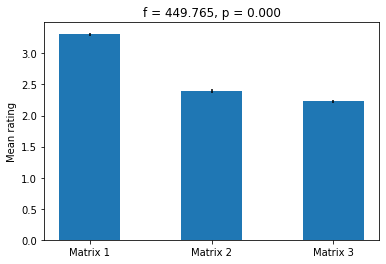

In [111]:
# Now, let's plot it:
x = ['Matrix 1', 'Matrix 2', 'Matrix 3'] # labels for the bars
xPos = np.array([1,2,3]) # x-values for the bars
plt.bar(xPos,descriptivesContainer[:,0],width=0.5,yerr=descriptivesContainer[:,3]) # bars + error  
plt.xticks(xPos, x) # label the x_pos with the labels
plt.ylabel('Mean rating') # add y-label
plt.title('f = {:.3f}'.format(f) + ', p = {:.3f}'.format(p)) # title is the test stat and p-value

Index(['10 things I hate about you (1999)', '12 Monkeys (1995)',
       '13 going on 30 (2004)', '21 Grams (2003)', '25th hour (2002)',
       '28 days later (2002)', '3000 Miles to Graceland (2001)',
       '8 Mile (2002)', 'A Night at the Roxbury (1998) ',
       'A time to kill (1996)',
       ...
       'Toy Story (1995)', 'Toy Story 2 (1999)', 'Unforgiven (1992)',
       'What Lies Beneath (2000)', 'What Women Want (2000)',
       'Wild Wild West (1999)', 'Wing Commander (1999)', 'X-Men (2000)',
       'X2 (2003)', 'Zoolander (2001)'],
      dtype='object', length=209)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   120 non-null    float64
 1   X1      120 non-null    int64  
 2   X2      120 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.9 KB
                sum_sq     df             F        PR(>F)
X1        2.999991e+01

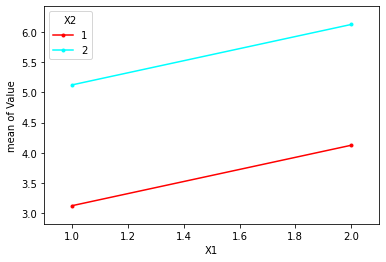

In [112]:
#%% Supplementary material 1: Representing the data with a Pandas dataframe and doing a 2-way ANOVA in Python and make an ANOVA table (and a means plot)

import pandas as pd

# 1. Load data:
df = pd.read_csv('movieRatingsDeidentified.csv',skipinitialspace=True)
# Fill empty strings with NaN
# Now we have the headers AND the data in one object
# This is a DataFrame. For handling tabular data.

# 2. Let's get a handle on our movie titles:
titles = df.columns 
print(titles)
# We won't use this for subsequent analyses, but it's nice to see all the titles at once

# 3. Find the Matrix data:
title = 'Matrix' # or any other title, for that matter
theMatrix = df.loc[:,df.columns.str.contains(title)]

# 4. Perform descriptives:
magic = theMatrix.describe()
# We don't have to run a loop or initialize a container
# We are still missing the SEM, so let's add it:
temp = magic.iloc[2,:]/np.sqrt(magic.iloc[0,:])
magic.loc['sem'] = temp

#%% Supplementary material 2: Do a two-way ANOVA and show an ANOVA table

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot as meansPlot

df = pd.read_csv('twoWayAnovaExample.csv',skipinitialspace=True) # load new data set
df.info() # What is the structure of the data frame?

model = ols('Value ~ X1 + X2 + X1:X2', data=df).fit() #Build the two-way ANOVA model. Value = y, X1,X2 = Main effects. X1:X2 = interaction effect
anova_table = sm.stats.anova_lm(model, typ=2) #Create the ANOVA table. Residual = Within
print(anova_table) #Show the ANOVA table

#Show the corresponding means plot
fig = meansPlot(x=df['X1'], trace=df['X2'], response=df['Value'])


## Try Yourself

### Are	Disney movies of inconsistent quality overall?

### Pick a few disney movies and try to figure out if they are well liked/watched by the audience on the same scale